In [1]:
import sklearn
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import os
import matplotlib.pyplot as plt
import argparse
from torch.autograd import Variable

In [5]:
X = np.load("/Users/srivatsavpyda/Desktop/gm_vae_project/tests/image_data.npy")
Z = np.load("/Users/srivatsavpyda/Desktop/gm_vae_project/tests/z_codes.npy")
labels = np.load("/Users/srivatsavpyda/Desktop/gm_vae_project/tests/labels.npy")

In [46]:
labels[0]

4.0

# PCA + TSNE on Original Images

In [21]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
pca_mnist = PCA(n_components=100)
Y = pca_mnist.fit_transform(X)
X_embedded = TSNE(n_components=2).fit_transform(Y)

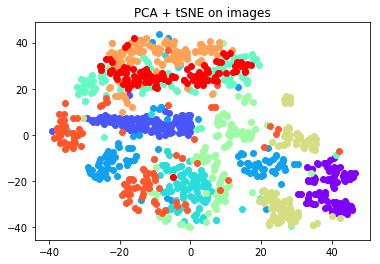

In [42]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, 10))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(10):
    c = colors[i,:]
    indices = labels == i
    ax.scatter(X_embedded[indices, 0], X_embedded[indices, 1], color=c, label=str(i))
#ax.legend(loc='upper center', bbox_to_anchor=(1.1, 0.85), shadow=True, ncol=1)
plt.title('PCA + tSNE on images')
plt.show()

# TSNE on Z-Codes

In [23]:
Z_embedded = TSNE(n_components=2).fit_transform(Z)

# Visualization

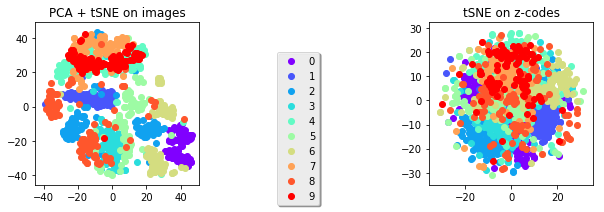

In [41]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, 10))

fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(1, 3, 1)
for i in range(10):
    c = colors[i,:]
    indices = labels == i
    ax.scatter(X_embedded[indices, 0], X_embedded[indices, 1], color=c, label=str(i))
ax.legend(loc='upper center', bbox_to_anchor=(1.6, 0.85), shadow=True, ncol=1)
ax.set_title('PCA + tSNE on images')


ax2 = fig.add_subplot(1 ,3, 3)
for i in range(10):
    c = colors[i,:]
    indices = labels == i
    ax2.scatter(Z_embedded[indices, 0], Z_embedded[indices, 1], color=c, label=str(i))
#ax2.legend(loc='upper center', bbox_to_anchor=(1.1, 0.85), shadow=True, ncol=1)
ax2.set_title('tSNE on z-codes')
plt.show()

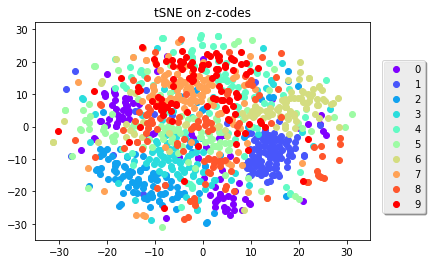

In [24]:
colors = cm.rainbow(np.linspace(0, 1, 10))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(10):
    c = colors[i,:]
    indices = labels == i
    ax.scatter(Z_embedded[indices, 0], Z_embedded[indices, 1], color=c, label=str(i))
ax.legend(loc='upper center', bbox_to_anchor=(1.1, 0.85), shadow=True, ncol=1)
plt.title('tSNE on z-codes')
plt.show()